## Oppgave 1. 
**I denne oppgaven skal du gjøre en statistisk analyse av kapasitetsfaktordataene.**

### a)
Plot alle dataseriene (gjerne som illustrative utsnitt av tidsseriene), og se om det er forskjeller mellom årstidene. Hva kan du si om solkraft nord og sør i Europa og vindkraft på de forskjellige stedene i Norge?

In [1]:
import pandas as pd
from pathlib import Path
import os
from plotutils import TimeSeriesPlotter

In [2]:
curr_file = os.path.abspath(".")
data_dir = Path(curr_file).parent / "data"
figure_dir = Path(curr_file).parent / "figures"
figure_dir.mkdir(exist_ok=True)

raw_solar = pd.read_csv(
    data_dir / "solar_daily_2014-2019.csv", parse_dates=["time"], index_col="time"
)
wind = pd.read_csv(
    data_dir / "onshore_daily_2014-20.csv", parse_dates=["time"], index_col="time"
)

# Convert to representative average values.
# Raw solar data is given by peak capacity at noon.
# Assuming the average lies at 50% of the peak capacity,
# and 12 hours of sunlight a day,
# the average solar capacity per day is given by 1/4 * peak capacity.
solar = raw_solar / 4

# A more accurate way to calculate the average solar capacity might be
# to take into account that the number of daylight hours varies vastly per season,
# especially in the northern hemisphere.

Plotting the entire data series is not very informative, as there are large variations from day to day.

<Figure size 800x600 with 0 Axes>

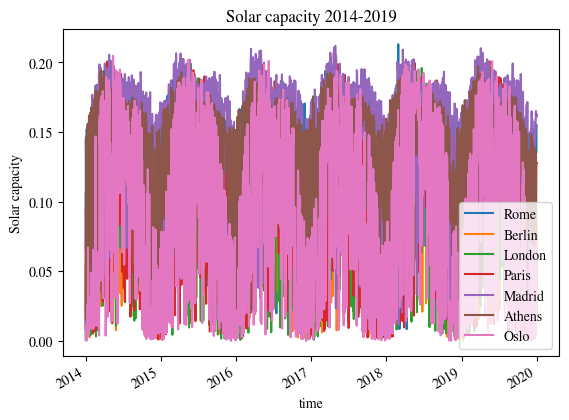

<Figure size 800x600 with 0 Axes>

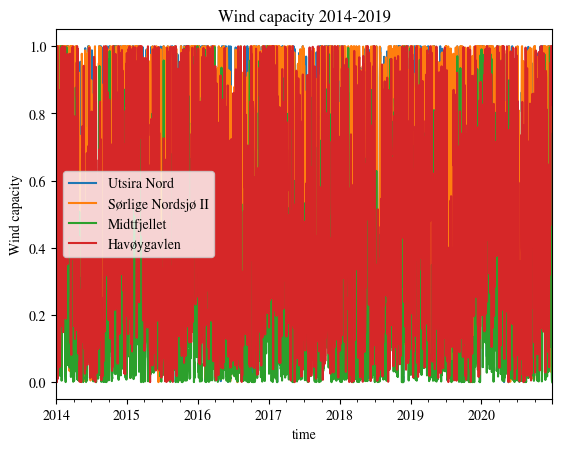

In [3]:
solar_cap = TimeSeriesPlotter(
    solar, period="2014-2019", datalabel="Solar capacity", save_dir=figure_dir / "Solar"
)
wind_cap = TimeSeriesPlotter(
    wind, period="2014-2019", datalabel="Wind capacity", save_dir=figure_dir / "Wind"
)

solar_cap.plot_raw()
wind_cap.plot_raw()

Instead, we focus on a single year. The year 2017 is arbitrarily chosen. Taking the cumulative sums and rolling averages, we are able to judge the data better.

<Figure size 800x600 with 0 Axes>

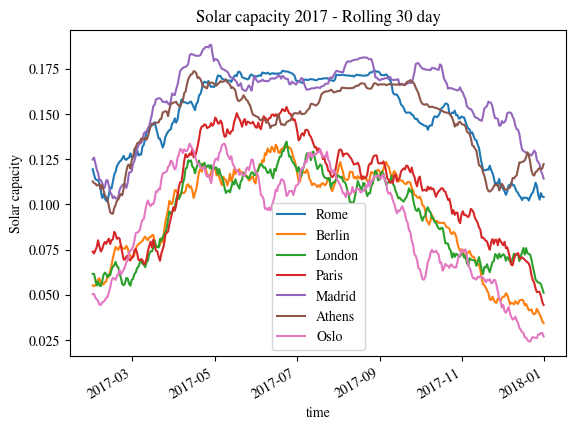

<Figure size 800x600 with 0 Axes>

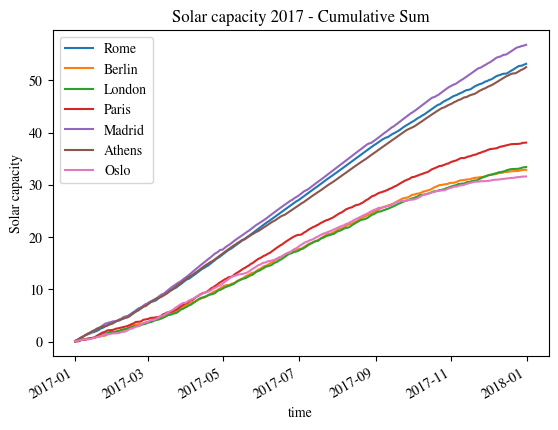

<Figure size 800x600 with 0 Axes>

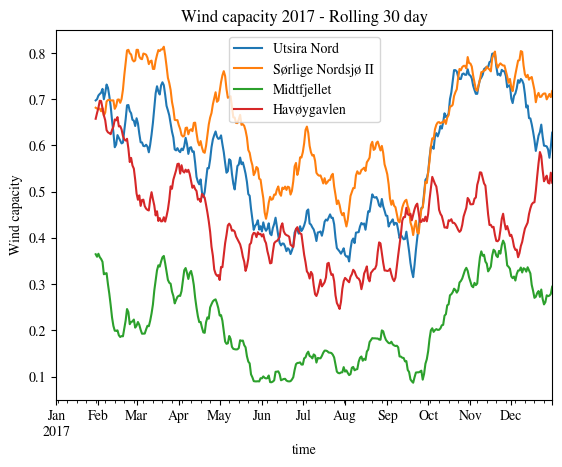

<Figure size 800x600 with 0 Axes>

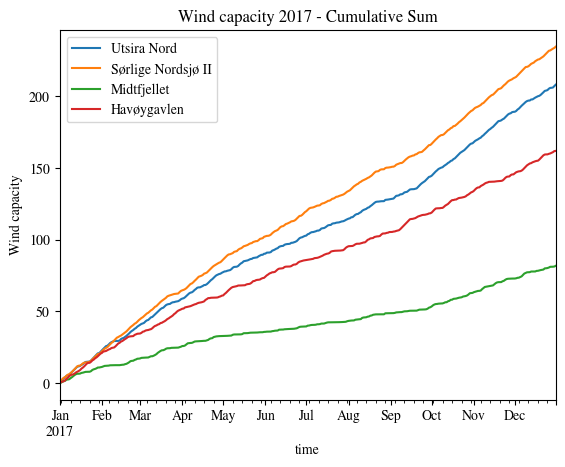

In [4]:
solar_cap.cumsum_rolling(2017)
wind_cap.cumsum_rolling(2017)

As we can see, the solar capacities in Madrid, Athens and Rome are a lot higher, while northern Europe performs worse.
This is intuitively what one would expect.
Taking the rolling average across the entire 2014-2019 period further illustrates that solar capacity is highly dependent on the season.

<Figure size 800x600 with 0 Axes>

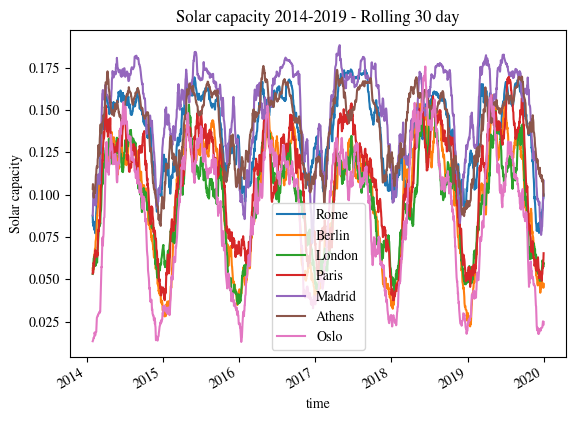

<Figure size 800x600 with 0 Axes>

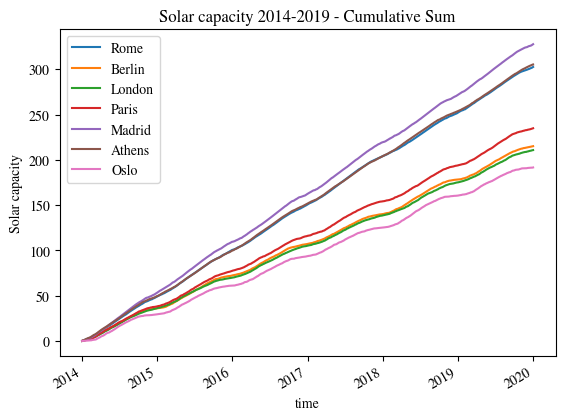

<Figure size 800x600 with 0 Axes>

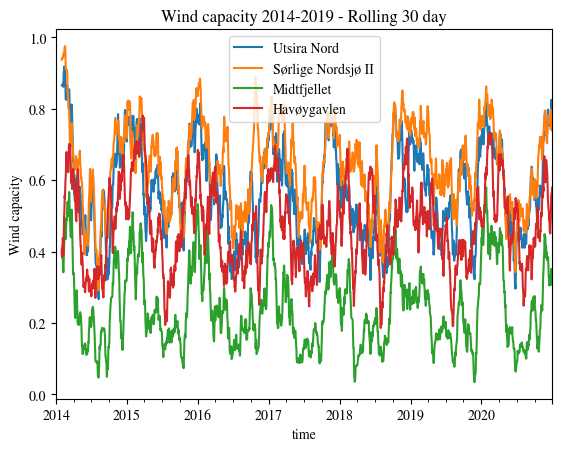

<Figure size 800x600 with 0 Axes>

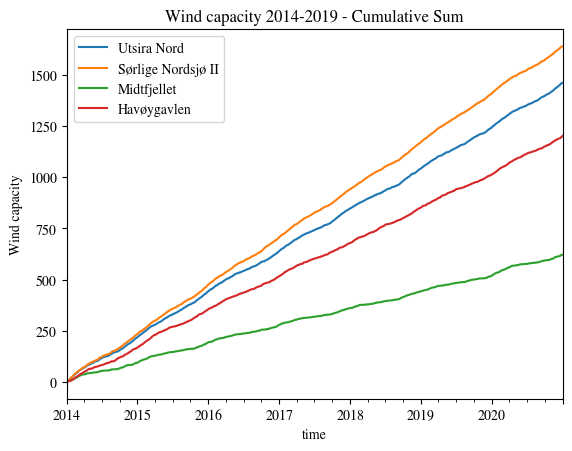

In [5]:
solar_cap.cumsum_rolling()
wind_cap.cumsum_rolling()

We use a heatmap in order to illustrate the differences between seasons.

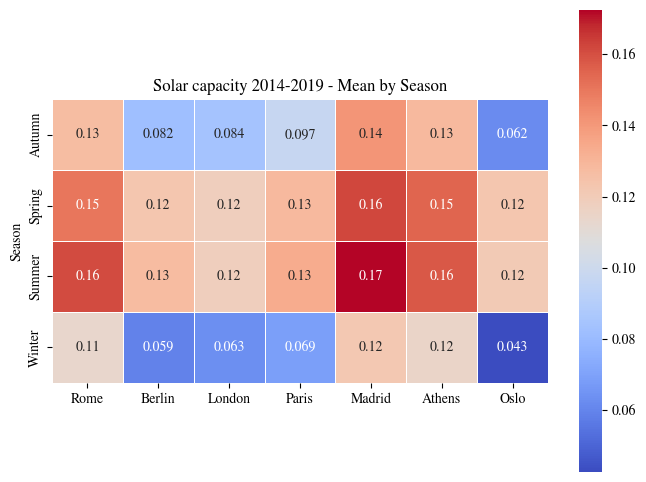

In [6]:
solar_cap.mean_by_season()

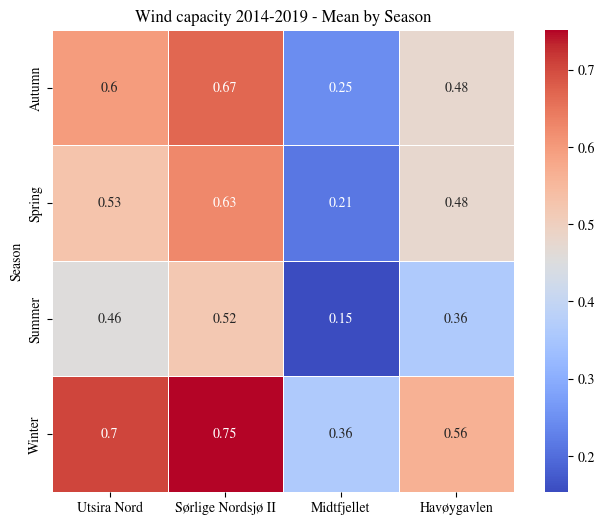

In [7]:
wind_cap.mean_by_season()

In [8]:
solar.head()
wind.head()

,Utsira Nord,Sørlige Nordsjø II,Midtfjellet,Havøygavlen
time,,,,
2014-01-01,0.979500,0.938708,0.517500,0.989833
2014-01-02,0.991417,0.904500,0.748542,0.947250
2014-01-03,0.999333,0.998708,0.803250,0.108042
2014-01-04,0.990875,0.995083,0.764667,0.207542
2014-01-05,0.928208,0.863417,0.424625,0.000208


In [9]:
mean_df = solar.mean()
mean_df["Madrid"] / mean_df["Oslo"]
wind.mean()

mean_df = wind.mean()
mean_df["Sørlige Nordsjø II"] / mean_df["Midtfjellet"]

2.6351181333105904

In [10]:
solar.var()

Rome      0.001906
Berlin    0.002968
London    0.002894
Paris     0.003259
Madrid    0.002161
Athens    0.001541
Oslo      0.003754
dtype: float64

b) Finn gjennomsnittlig kapasitetsfaktor for hver sol- og vind-dataserie. Husk å omforme sol-dataene til representative daglige verdier.
c) Finn varians og standardavvik for kapasitetsfaktorene i hver lokasjon og hver teknologi (det vil si, sol og vind)
d) Finn kovariansen til kapasitetsfaktorene mellom lokasjoner for vind. Hva blir korrelasjonene?
e) Finn kovariansen til kapasitetsfaktorene mellom lokasjoner for sol. Hva blir korrelasjonene?
f) Finn varians-kovariansmatrisen for kapasitetsfaktorene til sol og for kapasitetsfaktorene til vind.

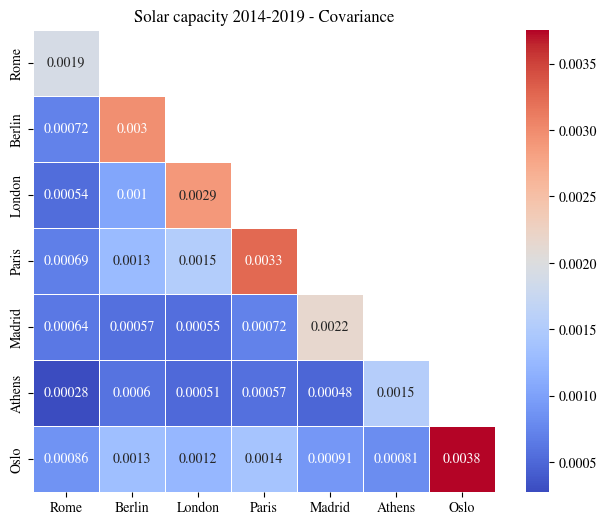

In [11]:
solar_cap.cov()

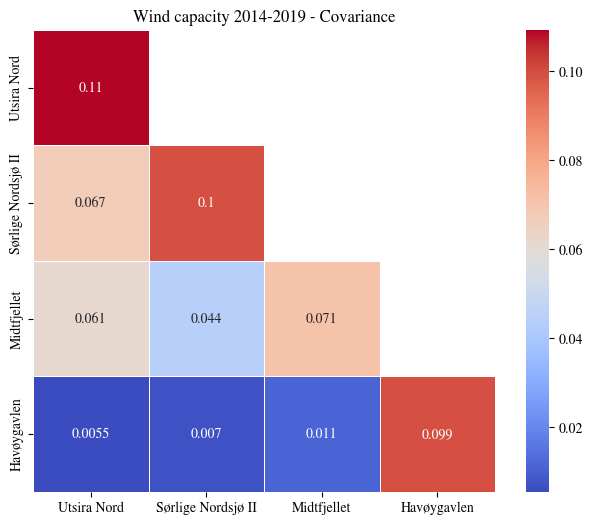

In [12]:
wind_cap.cov()

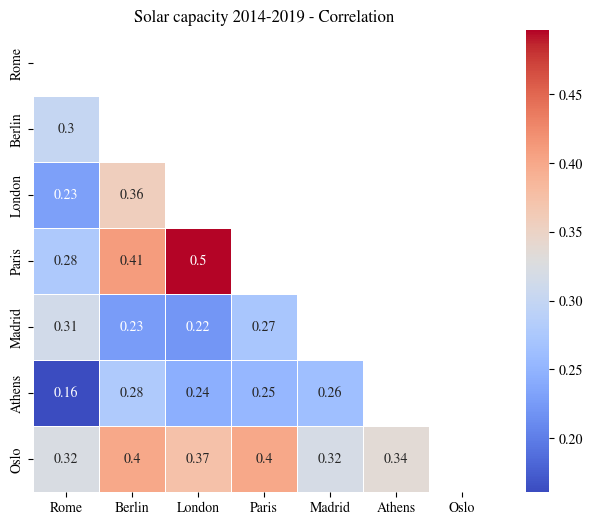

In [13]:
solar_cap.corr()

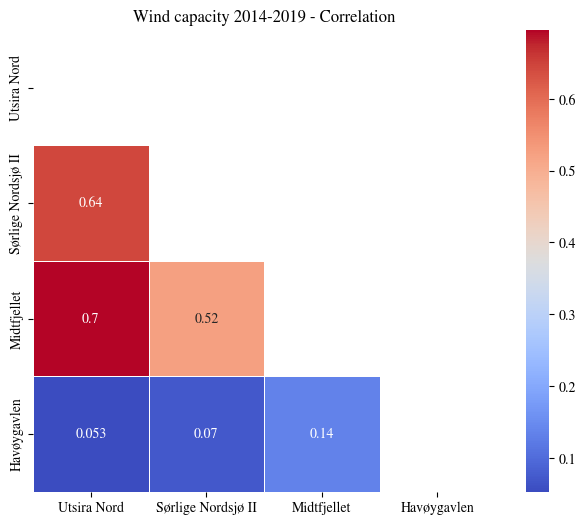

In [14]:
wind_cap.corr()

In [15]:
print(solar.std().to_latex())

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
Rome & 0.043663 \\
Berlin & 0.054475 \\
London & 0.053795 \\
Paris & 0.057088 \\
Madrid & 0.046485 \\
Athens & 0.039253 \\
Oslo & 0.061271 \\
\bottomrule
\end{tabular}



In [16]:
print(wind.std().to_latex())

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
Utsira Nord & 0.330635 \\
Sørlige Nordsjø II & 0.315474 \\
Midtfjellet & 0.266767 \\
Havøygavlen & 0.315342 \\
\bottomrule
\end{tabular}



In [17]:
print(solar.cov().to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & Rome & Berlin & London & Paris & Madrid & Athens & Oslo \\
\midrule
Rome & 0.001906 & 0.000715 & 0.000539 & 0.000689 & 0.000637 & 0.000276 & 0.000863 \\
Berlin & 0.000715 & 0.002968 & 0.001045 & 0.001277 & 0.000571 & 0.000595 & 0.001335 \\
London & 0.000539 & 0.001045 & 0.002894 & 0.001526 & 0.000551 & 0.000515 & 0.001232 \\
Paris & 0.000689 & 0.001277 & 0.001526 & 0.003259 & 0.000720 & 0.000568 & 0.001400 \\
Madrid & 0.000637 & 0.000571 & 0.000551 & 0.000720 & 0.002161 & 0.000479 & 0.000908 \\
Athens & 0.000276 & 0.000595 & 0.000515 & 0.000568 & 0.000479 & 0.001541 & 0.000807 \\
Oslo & 0.000863 & 0.001335 & 0.001232 & 0.001400 & 0.000908 & 0.000807 & 0.003754 \\
\bottomrule
\end{tabular}



In [18]:
print(wind.cov().to_latex())

\begin{tabular}{lrrrr}
\toprule
 & Utsira Nord & Sørlige Nordsjø II & Midtfjellet & Havøygavlen \\
\midrule
Utsira Nord & 0.109319 & 0.067227 & 0.061392 & 0.005485 \\
Sørlige Nordsjø II & 0.067227 & 0.099524 & 0.044098 & 0.006990 \\
Midtfjellet & 0.061392 & 0.044098 & 0.071165 & 0.011390 \\
Havøygavlen & 0.005485 & 0.006990 & 0.011390 & 0.099441 \\
\bottomrule
\end{tabular}

